## SCP Statements Exploration

The SCP-ECG standard (Standard Communications Protocol for Computer Assisted Electrocardiography) is used to describe various aspects of ECG data, such as measurements, annotations, and metadata. These statements are part of the SCP-ECG standard, which is designed to facilitate the digital exchange of ECG signals and related metadata. The SCP-ECG standard provides a structured way to communicate ECG data, ensuring interoperability and compatibility across different ECG devices and systems.

## Packages Import & Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wfdb
from scipy import signal as sig

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None) 
df = pd.read_csv(r'scp_statements.csv')
df

,Unnamed: 0,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
0,NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
1,NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnormalities,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
2,DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
3,LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
4,NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
5,IMI,inferior myocardial infarction,1.0,NaN,NaN,MI,IMI,Myocardial Infarction,inferior myocardial infarction,161.0,NaN,NaN,NaN
6,ASMI,anteroseptal myocardial infarction,1.0,NaN,NaN,MI,AMI,Myocardial Infarction,anteroseptal myocardial infarction,165.0,NaN,NaN,NaN
7,LVH,left ventricular hypertrophy,1.0,NaN,NaN,HYP,LVH,Ventricular Hypertrophy,left ventricular hypertrophy,142.0,NaN,C71076,NaN
8,LAFB,left anterior fascicular block,1.0,NaN,NaN,CD,LAFB/LPFB,Intraventricular and intra-atrial Conduction disturbances,left anterior fascicular block,101.0,MDC_ECG_BEAT_BLK_ANT_L_HEMI,C62267,D3-33140
9,ISC_,non-specific ischemic,1.0,NaN,NaN,STTC,ISC_,Basic roots for coding ST-T changes and abnormalities,ischemic ST-T changes,226.0,NaN,NaN,NaN


So, as we've previously known The SCP codes dataset is the  lookup table for all the clinical codes in the original dataframe, and it contains 71 rows, one for every unique code in the PTB-XL dataset. The raw waveform data was annotated by up to two cardiologists, who assigned potentially multiple ECG statements to each record. 

The next steps is to further discovering these annotatins, and meta data for further analysis and understanding of the nature of the data and heart diagnostics.

## Data Exploration

In [4]:
df.shape

(71, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     71 non-null     object 
 1   description                    71 non-null     object 
 2   diagnostic                     44 non-null     float64
 3   form                           19 non-null     float64
 4   rhythm                         12 non-null     float64
 5   diagnostic_class               44 non-null     object 
 6   diagnostic_subclass            44 non-null     object 
 7   Statement Category             71 non-null     object 
 8   SCP-ECG Statement Description  71 non-null     object 
 9   AHA code                       37 non-null     float64
 10  aECG REFID                     23 non-null     object 
 11  CDISC Code                     13 non-null     object 
 12  DICOM Code                     13 non-null     objec

First of all, the data is 71 rows long, and 13 columns wide. 

It contains 4 decimal valued columns: **diagnostic**, **form**, **rhytm**, and **AHA code**. The rest of the columns are 'string' variables, means they are all textual information.

It also appears that lots of them have several missing or null values such as: 'form', 'rhythm', 'aECG REFID', 'CDISC Code', and finally 'DICOM Code'.

Moving on to the next step (summary stats) to further digging into more details about each column and the significance of these missing values.

In [6]:
df.describe(include = 'all')

,Unnamed: 0,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
count,71,71,44.0,19.0,12.0,44,44,71,71,37.000000,23,13,13
unique,71,71,NaN,NaN,NaN,5,23,15,66,NaN,23,13,13
top,NDT,non-diagnostic T abnormalities,NaN,NaN,NaN,MI,IMI,Statements related to impulse formation (abnormalities),in inferior leads,NaN,MDC_ECG_RHY_STHILOST,C71076,F-000B7
freq,1,1,NaN,NaN,NaN,14,6,10,2,NaN,1,1,1
mean,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,144.297297,NaN,NaN,NaN
std,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,119.739037,NaN,NaN,NaN
min,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,NaN
50%,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,140.000000,NaN,NaN,NaN
75%,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,162.000000,NaN,NaN,NaN


The 'diagnostic' column has unique 71 descriptions of each corresponding state or annotation, meaning if we took a pateint labeled as "NORM", the diagnostic statement for those set of patients is 'normal ECG' and they all fall under the category, diagonstic class/superclass as  'Normal ECG'.

It looks like the columns 'diagnostic', 'form', and 'rhythm' are Binary variables of **1**, or **Null**, where very likely that **1** means there's a diagnostic class or category for that patient for further information about his condition or heart state, and **Null** meaning there is no much information or details about that condition (My description is necessarily simplified and may contain factual inaccuracies.).

Regarding 'diagnostic_class' and 'diagnostic_subclass'. the **diagnsotic_class** is more not specific ECG-based pattern or category, while **diagnostic_subclass** is more specific, more clinically interetable diagnoses-closer to what a cardiologist would actually write, for instance, IMI (inferior Myocardial Infraction) is much more specific than just presenting it as MI. And RVH (Right ventricular hypertrophy) is also more detailed than just writing 'HYP', and so on.

'AHA' codes are just ID's ,refer to the American Heart Association ECG diagnostic codes, it’s used to Standardize ECG interpretations and make reports readable across hospitals.

In [7]:
superclasses1 = df['diagnostic_class'].value_counts().reset_index()
superclasses = superclasses1.iloc[:, 0:1]
superclasses

,diagnostic_class
0,MI
1,STTC
2,CD
3,HYP
4,NORM


This variable represents the diagonostic classes (ECG-based pattern categories), here is what do they mean:
1. Myocardial Infarction (MI) occurs when blood flow decreases or stops in one of the arteries of the heart, causing infarction (tissue death) to the heart muscle.
2. STTC (ST-segment & T-wave changes) likely refers to sternal cord compression, which is a condition affecting the heart. It can be associated with various heart conditions, including: Endocarditis, Arrhythmias, or Congenital Heart Disease.
3. Coronary artery disease (CAD), also called coronary disease (CD) is a type of heart disease involving the reduction of blood flow to the cardiac muscle due to a build-up of atheromatous plaque in the arteries of the heart.
4. HYP refers to a condition characterized by widespread connective tissue differences, often due to genetic factors, environmental influences, or health issues.
5. NORM, or Normal, typically indacates that there are no significant health issues or functional abnormalities present in the heart :)

In [8]:
aggergations = df.set_index('Unnamed: 0')['diagnostic_class'].to_dict()
superclasses = set(aggergations.values())
print(f'aggregations:{aggergations}')
print(f'superclasses:{superclasses}')

aggregations:{'NDT': 'STTC', 'NST_': 'STTC', 'DIG': 'STTC', 'LNGQT': 'STTC', 'NORM': 'NORM', 'IMI': 'MI', 'ASMI': 'MI', 'LVH': 'HYP', 'LAFB': 'CD', 'ISC_': 'STTC', 'IRBBB': 'CD', '1AVB': 'CD', 'IVCD': 'CD', 'ISCAL': 'STTC', 'CRBBB': 'CD', 'CLBBB': 'CD', 'ILMI': 'MI', 'LAO/LAE': 'HYP', 'AMI': 'MI', 'ALMI': 'MI', 'ISCIN': 'STTC', 'INJAS': 'MI', 'LMI': 'MI', 'ISCIL': 'STTC', 'LPFB': 'CD', 'ISCAS': 'STTC', 'INJAL': 'MI', 'ISCLA': 'STTC', 'RVH': 'HYP', 'ANEUR': 'STTC', 'RAO/RAE': 'HYP', 'EL': 'STTC', 'WPW': 'CD', 'ILBBB': 'CD', 'IPLMI': 'MI', 'ISCAN': 'STTC', 'IPMI': 'MI', 'SEHYP': 'HYP', 'INJIN': 'MI', 'INJLA': 'MI', 'PMI': 'MI', '3AVB': 'CD', 'INJIL': 'MI', '2AVB': 'CD', 'ABQRS': nan, 'PVC': nan, 'STD_': nan, 'VCLVH': nan, 'QWAVE': nan, 'LOWT': nan, 'NT_': nan, 'PAC': nan, 'LPR': nan, 'INVT': nan, 'LVOLT': nan, 'HVOLT': nan, 'TAB_': nan, 'STE_': nan, 'PRC(S)': nan, 'SR': nan, 'AFIB': nan, 'STACH': nan, 'SARRH': nan, 'SBRAD': nan, 'PACE': nan, 'SVARR': nan, 'BIGU': nan, 'AFLT': nan, 'SVTAC

In [18]:
record = wfdb.rdrecord('10000_hr')

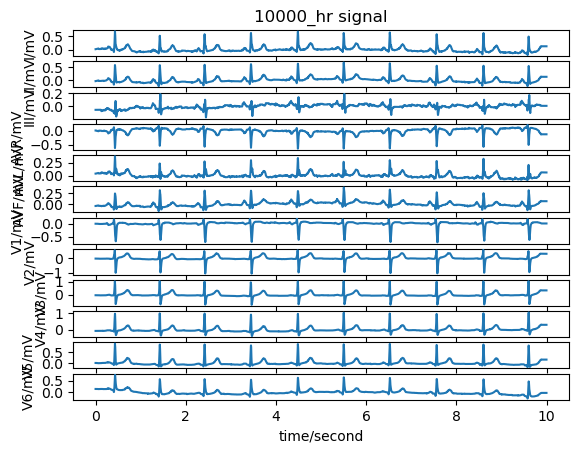

In [21]:
wfdb.plot_wfdb(record, title = '10000_hr signal')

In [22]:
rheader = wfdb.rdheader('10000_hr')
rheader

In [23]:
help(rheader)

Help on Record in module wfdb.io.record object:

class Record(BaseRecord, wfdb.io._header.HeaderMixin, wfdb.io._signal.SignalMixin)
 |  Record(p_signal=None, d_signal=None, e_p_signal=None, e_d_signal=None, record_name=None, n_sig=None, fs=None, counter_freq=None, base_counter=None, sig_len=None, base_time=None, base_date=None, base_datetime=None, file_name=None, fmt=None, samps_per_frame=None, skew=None, byte_offset=None, adc_gain=None, baseline=None, units=None, adc_res=None, adc_zero=None, init_value=None, checksum=None, block_size=None, sig_name=None, comments=None)
 |
 |  The class representing single segment WFDB records.
 |
 |  Record objects can be created using the initializer, by reading a WFDB
 |  header with `rdheader`, or a WFDB record (header and associated dat files)
 |  with `rdrecord`.
 |
 |  The attributes of the Record object give information about the record as
 |  specified by: https://www.physionet.org/physiotools/wag/header-5.htm
 |
 |  In addition, the d_signal 

In [24]:
record.init_value

[20, -35, -55, 8, 38, -45, 0, -30, -40, -70, 5, 145]

In [27]:
record.adc_res

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]

In [28]:
record.baseline

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [29]:
record.file_name

['10000_hr.dat',
 '10000_hr.dat',
 '10000_hr.dat',
 '10000_hr.dat',
 '10000_hr.dat',
 '10000_hr.dat',
 '10000_hr.dat',
 '10000_hr.dat',
 '10000_hr.dat',
 '10000_hr.dat',
 '10000_hr.dat',
 '10000_hr.dat']

In [30]:
record.n_sig

12

In [35]:
fs = record.fs
fs

500

In [33]:
signal_values = record.p_signal

In [34]:
V1 = record.p_signal[:, 6]
V1

array([0.  , 0.  , 0.  , ..., 0.01, 0.01, 0.01])

In [36]:
signal_length = record.sig_len
signal_length

5000

In [37]:
signal_Lead_names = record.sig_name
signal_Lead_names

['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

In [38]:
signal_Lead_units = record.units
signal_Lead_units

['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV']

In [44]:
time_vector = np.linspace(0, 10, 5000)

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\HP\AppData\Local\Temp\ipykernel_1076\4007613129.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Voltage ($\mu V$)')


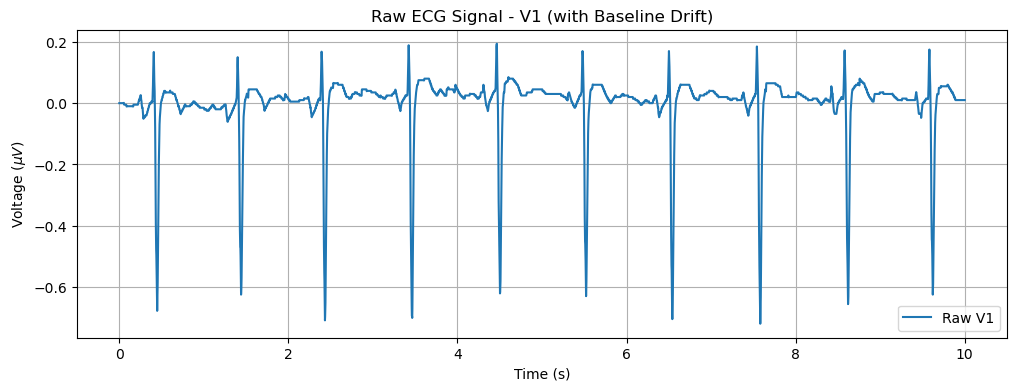

In [45]:
raw_signal_v1 = signal_values[:, 6]

plt.figure(figsize=(12, 4))
plt.plot(time_vector, raw_signal_v1, label='Raw V1')
plt.title('Raw ECG Signal - V1 (with Baseline Drift)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage ($\mu V$)')
plt.grid(True)
plt.legend()
plt.show()

## Citations & More info

1. [SCP-ECG](https://www.cinc.org/archives/2016/pdf/090-500.pdf)
2. [Myocardial Infraction](https://www.mayoclinic.org/diseases-conditions/heart-attack/symptoms-causes/syc-20373106)
3. [CAD](https://en.wikipedia.org/wiki/Coronary_artery_disease)
4. [Common Codes](https://www.practicefusion.com/icd-10/clinical-concepts-for-cardiology/icd-10-codes/)
5. [AHA Codes](https://www.ahajournals.org/doi/10.1161/CIR.0000000000001383)